<a href="https://colab.research.google.com/github/Cherrymmu/AIFFEL_Online_Quest_Cherry/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/10_%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10-2. Boston 주택 가격 예측 모델
---


![스크린샷 2023-12-20 오후 3.06.58.png](<attachment:스크린샷 2023-12-20 오후 3.06.58.png>)

데이터 로드 및 전처리
---
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
standard = train_data.std(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data -= mean
train_data /= standard

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= standard

# 결과 확인
print("처리 후 학습 데이터셋:")
print(train_data[0])
print("처리 후 테스트 데이터셋:")
print(test_data[0])

처리 후 학습 데이터셋:
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
처리 후 테스트 데이터셋:
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


모델 구성 및 컴파일
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.





In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense (64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense (32, activation='relu'))
model.add(Dense (1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# 모델 학습
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 체크포인트 콜백
check_point_cb = ModelCheckpoint('best_model.h5', save_best_only=True)

# 조기 중단 콜백
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# 모델 학습
house = model.fit(train_data, train_labels,
                  epochs=30,
                  batch_size=32,
                  validation_split=0.2,
                  callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
11/11 [==============================] - 5s 134ms/step - loss: 546.1910 - mae: 21.3717 - val_loss: 594.2701 - val_mae: 22.4395
Epoch 2/30
 7/11 [==================>...........] - ETA: 0s - loss: 519.9873 - mae: 20.7305

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 36ms/step - loss: 506.3100 - mae: 20.3913 - val_loss: 549.6366 - val_mae: 21.3866
Epoch 3/30
11/11 [==============================] - 0s 35ms/step - loss: 460.1747 - mae: 19.2044 - val_loss: 495.2065 - val_mae: 20.0729
Epoch 4/30
11/11 [==============================] - 0s 34ms/step - loss: 401.6535 - mae: 17.6414 - val_loss: 425.4932 - val_mae: 18.2710
Epoch 5/30
11/11 [==============================] - 0s 21ms/step - loss: 331.1188 - mae: 15.6551 - val_loss: 343.8582 - val_mae: 16.0192
Epoch 6/30
11/11 [==============================] - 1s 54ms/step - loss: 253.2108 - mae: 13.3425 - val_loss: 259.6302 - val_mae: 13.4698
Epoch 7/30
11/11 [==============================] - 0s 35ms/step - loss: 178.6664 - mae: 10.8609 - val_loss: 185.4770 - val_mae: 10.7116
Epoch 8/30
11/11 [==============================] - 0s 33ms/step - loss: 121.5297 - mae: 8.7169 - val_loss: 129.8856 - val_mae: 8.6705
Epoch 9/30
11/11 [==============================] - 1s

<ipython-input-6-5abb02c84a22>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


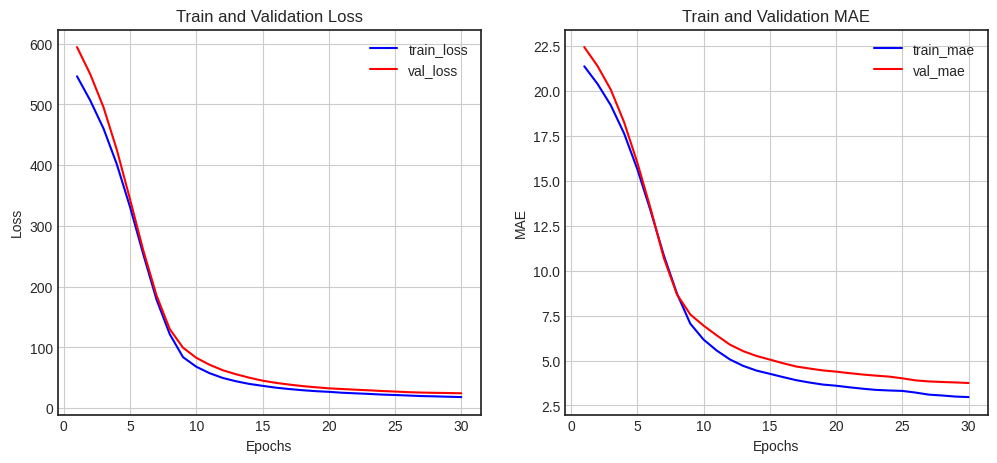

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

house_dict = house.history

loss = house_dict['loss']
val_loss = house_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = house_dict['mae']
val_mae = house_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측
테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.





In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

4/4 [==============================] - 0s 3ms/step - loss: 27.7557 - mae: 4.0862
Test Loss: 27.755659103393555
Test MAE: 4.0861945152282715


10-3. Reuters 딥러닝 모델
---
이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

데이터 로드 및 전처리
reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다.

하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다.

8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

데이터 로드 및 전처리
reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 훈련 데이터셋과 벨리데이션 데이터셋 나누기
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
원-핫 인코딩 함수를 직접 만들어보세요.
레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

모델 구성 및 컴파일
---
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

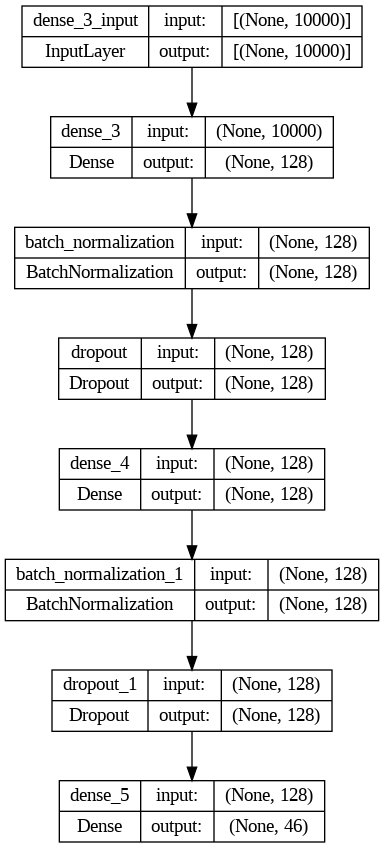

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)              

모델 학습
---
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 체크포인트 콜백
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)

# 조기 중단
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
53/53 [==============================] - 4s 55ms/step - loss: 1.7746 - accuracy: 0.6467 - val_loss: 2.7055 - val_accuracy: 0.7903
Epoch 2/50
 1/53 [..............................] - ETA: 3s - loss: 0.6177 - accuracy: 0.8906

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 4s 77ms/step - loss: 0.6163 - accuracy: 0.8817 - val_loss: 2.3652 - val_accuracy: 0.8094
Epoch 3/50
53/53 [==============================] - 2s 43ms/step - loss: 0.3230 - accuracy: 0.9378 - val_loss: 1.9025 - val_accuracy: 0.8215
Epoch 4/50
53/53 [==============================] - 2s 45ms/step - loss: 0.2274 - accuracy: 0.9546 - val_loss: 1.4749 - val_accuracy: 0.8210
Epoch 5/50
53/53 [==============================] - 2s 41ms/step - loss: 0.1838 - accuracy: 0.9620 - val_loss: 1.1776 - val_accuracy: 0.8179
Epoch 6/50
53/53 [==============================] - 2s 46ms/step - loss: 0.1725 - accuracy: 0.9629 - val_loss: 1.0058 - val_accuracy: 0.8192
Epoch 7/50
53/53 [==============================] - 4s 68ms/step - loss: 0.1580 - accuracy: 0.9648 - val_loss: 0.9834 - val_accuracy: 0.8272
Epoch 8/50
53/53 [==============================] - 3s 49ms/step - loss: 0.1508 - accuracy: 0.9620 - val_loss: 0.9646 - val_accuracy: 0.8246
Epoch 9/50
53/53 [======

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.





<ipython-input-14-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


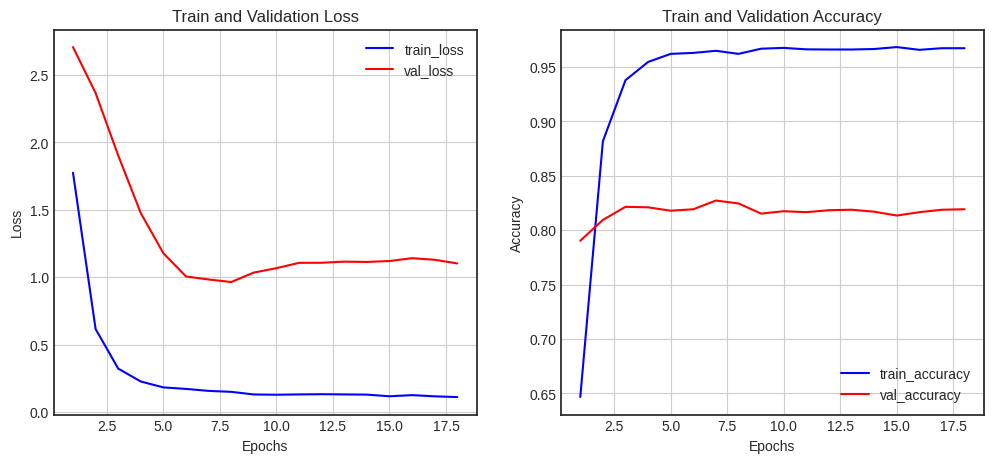

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측
---
테스트 데이터셋을 이용해 모델을 평가합니다.

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

71/71 [==============================] - 1s 9ms/step - loss: 1.0554 - accuracy: 0.8059
Test Loss: 1.055416226387024
Test Accuracy: 0.8058770895004272


# 10-4. CIFAR10 딥러닝 모델

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

데이터 로드 및 전처리
---
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.





In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from sklearn.model_selection import train_test_split

# CIFAR-10 데이터셋 부르기
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋 분할
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.20, random_state=42)

# 데이터셋 크기 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

<ipython-input-19-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


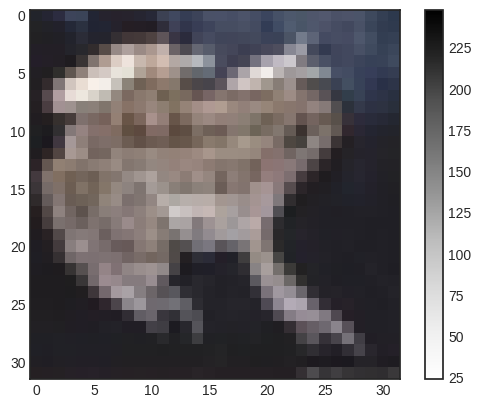

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.





In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

# 레이블 데이터 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

모델 구성 및 컴파일
---
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 128)              

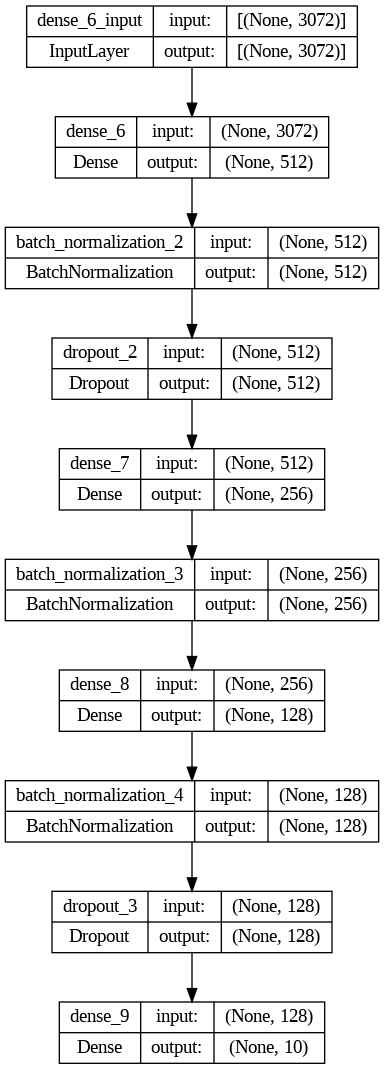

In [25]:
utils.plot_model(model, show_shapes=True)

모델 학습
---
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)

# 조기 중단
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
625/625 [==============================] - 27s 40ms/step - loss: 1.9665 - accuracy: 0.3181 - val_loss: 1.9384 - val_accuracy: 0.3244
Epoch 2/50
  3/625 [..............................] - ETA: 17s - loss: 1.8124 - accuracy: 0.3542

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 23s 37ms/step - loss: 1.7054 - accuracy: 0.3929 - val_loss: 1.8282 - val_accuracy: 0.3480
Epoch 3/50
625/625 [==============================] - 24s 39ms/step - loss: 1.6496 - accuracy: 0.4108 - val_loss: 1.8145 - val_accuracy: 0.3450
Epoch 4/50
625/625 [==============================] - 23s 36ms/step - loss: 1.6083 - accuracy: 0.4237 - val_loss: 1.6087 - val_accuracy: 0.4174
Epoch 5/50
625/625 [==============================] - 23s 37ms/step - loss: 1.5885 - accuracy: 0.4333 - val_loss: 1.6406 - val_accuracy: 0.4083
Epoch 6/50
625/625 [==============================] - 23s 37ms/step - loss: 1.5830 - accuracy: 0.4322 - val_loss: 1.6058 - val_accuracy: 0.4207
Epoch 7/50
625/625 [==============================] - 23s 36ms/step - loss: 1.5692 - accuracy: 0.4371 - val_loss: 1.5862 - val_accuracy: 0.4267
Epoch 8/50
625/625 [==============================] - 24s 38ms/step - loss: 1.5495 - accuracy: 0.4499 - val_loss: 1.5500 - val_accuracy: 0.4509
Epo

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

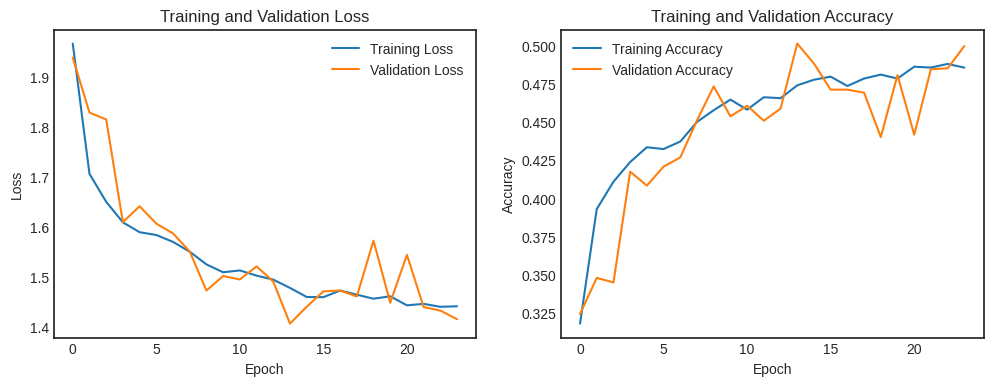

In [29]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 손실 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

모델 평가 및 예측
---
테스트 데이터셋을 이용해 모델을 평가합니다.

In [30]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3949 - accuracy: 0.5044


[1.3948602676391602, 0.5044000148773193]

이번 시간 정리
이번 시간에는 딥러닝을 이용해 주택 가격 예측, 뉴스 주제 분류, 이미지 분류 등 다양한 응용에 활용하는 방법을 익혔습니다.

어떤 데이터를 다루느냐에 따라 다양한 아키텍처를 사용해야 한다는 사실도 배웠습니다.

따라서 이 과정 이후에 컴퓨터 비전, 자연어 처리 등과 같이 세분화된 딥러닝 모델을 익혀야 합니다.

앞으로 다양한 딥러닝 모델을 학습하여 훌륭한 인공지능/딥러닝 개발자가 되시길 바라겠습니다.

수고 많으셨습니다.



# 회고

---

### Keep
: 노드를 잘 따라갔어서 무엇을 해야할지 이제 좀 더 잘 보인다. 저번 메인퀘스트때 보다 많은 오버피팅 방지를 위해 최적화를 노력했다.

### Problem
: 중간중간 확인한다고 오버피팅이 생긴 것 같다.... 그래서

### Try
: 다음에는 라벨링을 좀 더 잘하구 규제를 적당히 넣고 돌려봐야겠다.

-> cifar 저 구조에서는 어큐러시가 낮을 수 밖에 없다. 그래서 CNN 구조를 활용해야만한다.

---